<a href="https://colab.research.google.com/github/raghavvv/colab_notebooks/blob/main/bible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-colab-selenium
!pip install pydub
!pip install soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00


In [2]:
import google_colab_selenium as gs
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os
import urllib.parse
import time
import pandas as pd
import io
from pydub import AudioSegment
import soundfile as sf

In [3]:
# Make a request to the webpage
url = "https://live.bible.is/bible/HINBIB/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [4]:
# Initialize WebDriver
driver = gs.Chrome()
url = "https://live.bible.is/bible/HINBIB/"
driver.get(url)

# Click the dropdown button to expand the menu
dropdown_button = driver.find_element(By.ID, "chapter-dropdown-button")
dropdown_button.click()

try:
    dropdown_menu_expanded = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.CLASS_NAME, "chapter-text-dropdown"))
    )
    print("Dropdown menu is expanded.")
except TimeoutError:
    print("Timeout waiting for dropdown menu to expand.")
    driver.quit()
    exit()

# Parse the updated HTML content after the dropdown menu has expanded
updated_html_content = driver.page_source
updated_soup = BeautifulSoup(updated_html_content, "html.parser")

directory = "bible_text"
os.makedirs(directory, exist_ok=True)

audio_directory = "bible_audio"
os.makedirs(audio_directory, exist_ok=True)

chapter_data = []

# Locate the "New Testament" section
testament_titles = updated_soup.find_all('div', class_='testament-title')
new_testament_div = None
for title in testament_titles:
    if 'New Testament' in title.text:
        new_testament_div = title
        break

if new_testament_div:
    print("New Testament section found.")
    # Find the book buttons after the "New Testament" div
    book_buttons = new_testament_div.find_next_siblings('div', class_='book-button')

    for book_button in book_buttons:
        if 'id' in book_button.attrs:
            book_id = book_button['id'][-3:]
            chapter_links = book_button.find_all('a', class_='chapter-box')
            for chapter_link in chapter_links:
                chapter_number = chapter_link.text.strip()
                chapter_url = f"https://live.bible.is/bible/HINBIB/{book_id}/{chapter_number}"
                # Download the chapter text
                chapter_response = requests.get(chapter_url)
                chapter_text = chapter_response.text

                # Store the downloaded chapter text in a directory
                text_file_path = os.path.join(directory, f"chapter_{book_id}_{chapter_number}.html")
                with open(text_file_path, "w", encoding="utf-8") as f:
                    f.write(chapter_text)
                    print(f"Chapter {chapter_number} of book {book_id} downloaded and stored.")

               # Find and download the audio file for the chapter
                chapter_soup = BeautifulSoup(chapter_text, "html.parser")
                audio_link_tag = chapter_soup.find('video', class_='audio-player')
                if audio_link_tag:
                    audio_url = urllib.parse.urljoin(chapter_url,audio_link_tag['src'])
                    audio_response = requests.get(audio_url)
                    audio_path = os.path.join(audio_directory, f"chapter_{book_id}_{chapter_number}.wav")
                    with open(audio_path, 'wb') as audio_file:
                        audio_file.write(audio_response.content)
                    print(f"Audio for chapter {chapter_number} of book {book_id} downloaded and stored.")
                else:
                    print(f"Audio link for chapter {chapter_number} of book {book_id} not found.")
                    audio_path = None  # Mark as None if no audio found

                # Append chapter details to the DataFrame list
                chapter_data.append({
                    'book_id': book_id,
                    'chapter_number': chapter_number,
                    'text_file_path': text_file_path,
                    'audio_file_path': audio_path
                })

                time.sleep(2)
else:
    print("New Testament div not found.")

# Close the WebDriver
driver.quit()

# Create a DataFrame from the collected data
chapters_df = pd.DataFrame(chapter_data)

# Save the DataFrame to a CSV file
chapters_df.to_csv('bible_chapters.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dropdown menu is expanded.
New Testament section found.
Chapter 1 of book MAT downloaded and stored.
Audio for chapter 1 of book MAT downloaded and stored.
Chapter 2 of book MAT downloaded and stored.
Audio link for chapter 2 of book MAT not found.
Chapter 3 of book MAT downloaded and stored.
Audio for chapter 3 of book MAT downloaded and stored.
Chapter 4 of book MAT downloaded and stored.
Audio link for chapter 4 of book MAT not found.
Chapter 5 of book MAT downloaded and stored.
Audio for chapter 5 of book MAT downloaded and stored.
Chapter 6 of book MAT downloaded and stored.
Audio for chapter 6 of book MAT downloaded and stored.
Chapter 7 of book MAT downloaded and stored.
Audio for chapter 7 of book MAT downloaded and stored.
Chapter 8 of book MAT downloaded and stored.
Audio for chapter 8 of book MAT downloaded and stored.
Chapter 9 of book MAT downloaded and stored.
Audio for chapter 9 of book MAT downloaded and stored.
Chapter 10 of book MAT downloaded and stored.
Audio for ch

In [5]:
chapters_df

,book_id,chapter_number,text_file_path,audio_file_path
0,MAT,1,bible_text/chapter_MAT_1.html,bible_audio/chapter_MAT_1.wav
1,MAT,2,bible_text/chapter_MAT_2.html,None
2,MAT,3,bible_text/chapter_MAT_3.html,bible_audio/chapter_MAT_3.wav
3,MAT,4,bible_text/chapter_MAT_4.html,None
4,MAT,5,bible_text/chapter_MAT_5.html,bible_audio/chapter_MAT_5.wav
...,...,...,...,...
255,REV,18,bible_text/chapter_REV_18.html,bible_audio/chapter_REV_18.wav
256,REV,19,bible_text/chapter_REV_19.html,bible_audio/chapter_REV_19.wav
257,REV,20,bible_text/chapter_REV_20.html,bible_audio/chapter_REV_20.wav
258,REV,21,bible_text/chapter_REV_21.html,bible_audio/chapter_REV_21.wav


In [6]:
chapters_df = pd.read_csv('/content/bible_chapters.csv')

chapters_df.describe()

,chapter_number
count,260.000000
mean,9.080769
std,7.016061
min,1.000000
25%,3.000000
50%,7.000000
75%,14.000000
max,28.000000


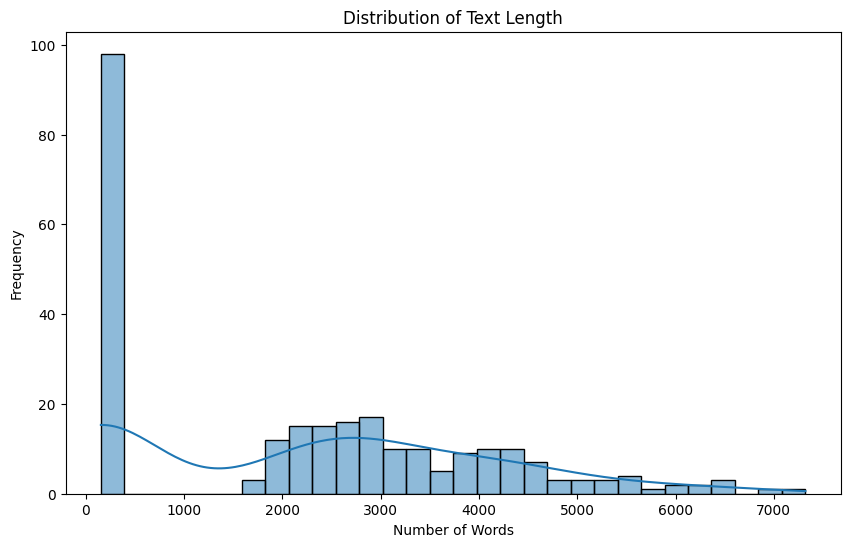

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Function to calculate text length
def get_text_length(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return len(text.split())

# Add a column for text length
chapters_df['text_length'] = chapters_df['text_file_path'].apply(get_text_length)

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(chapters_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Error processing bible_audio/chapter_MAT_1.wav: Error opening 'bible_audio/chapter_MAT_1.wav': Format not recognised.
Error processing bible_audio/chapter_MAT_3.wav: Error opening 'bible_audio/chapter_MAT_3.wav': Format not recognised.
Error processing bible_audio/chapter_MAT_5.wav: Error opening 'bible_audio/chapter_MAT_5.wav': Format not recognised.
Error processing bible_audio/chapter_MAT_6.wav: Error opening 'bible_audio/chapter_MAT_6.wav': Format not recognised.
Error processing bible_audio/chapter_MAT_7.wav: Error opening 'bible_audio/chapter_MAT_7.wav': Format not recognised.
Error processing bible_audio/chapter_MAT_8.wav: Error opening 'bible_audio/chapter_MAT_8.wav': Format not recognised.
Error processing bible_audio/chapter_MAT_9.wav: Error opening 'bible_audio/chapter_MAT_9.wav': Format not recognised.
Error processing bible_audio/chapter_MAT_10.wav: Error opening 'bible_audio/chapter_MAT_10.wav': Format not recognised.
Error processing bible_audio/chapter_MAT_11.wav: Error

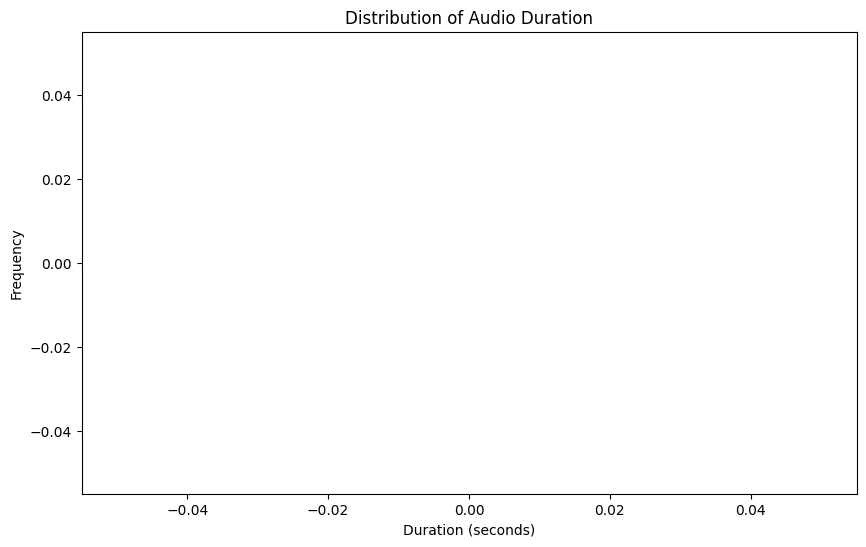

In [10]:
# Function to get audio duration in seconds using soundfile
def get_audio_duration(file_path):
    if pd.isna(file_path) or not os.path.exists(file_path):
        return None
    try:
        audio_data, sample_rate = sf.read(file_path)
        duration = len(audio_data) / sample_rate
        return duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Add a column for audio duration
chapters_df['audio_duration'] = chapters_df['audio_file_path'].apply(get_audio_duration)

# Plot audio duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(chapters_df['audio_duration'].dropna(), bins=30, kde=True)
plt.title('Distribution of Audio Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()
